<a href="https://colab.research.google.com/github/suvrashaw/Lane-Detect-Py/blob/prime/Lane_Detect_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Time Road Lane Detection using Open CV Library**
> **An ML assesment as a part of Hack Club UEMK.** [LinkedIn](https://www.linkedin.com/company/hackclubuemk/) [Facebook](https://www.facebook.com/hackclubuemk/)
---
**By Suvra Shaw, Core Member, Hack Club UEMK. Dt. 03 Jul 2021, Thu**





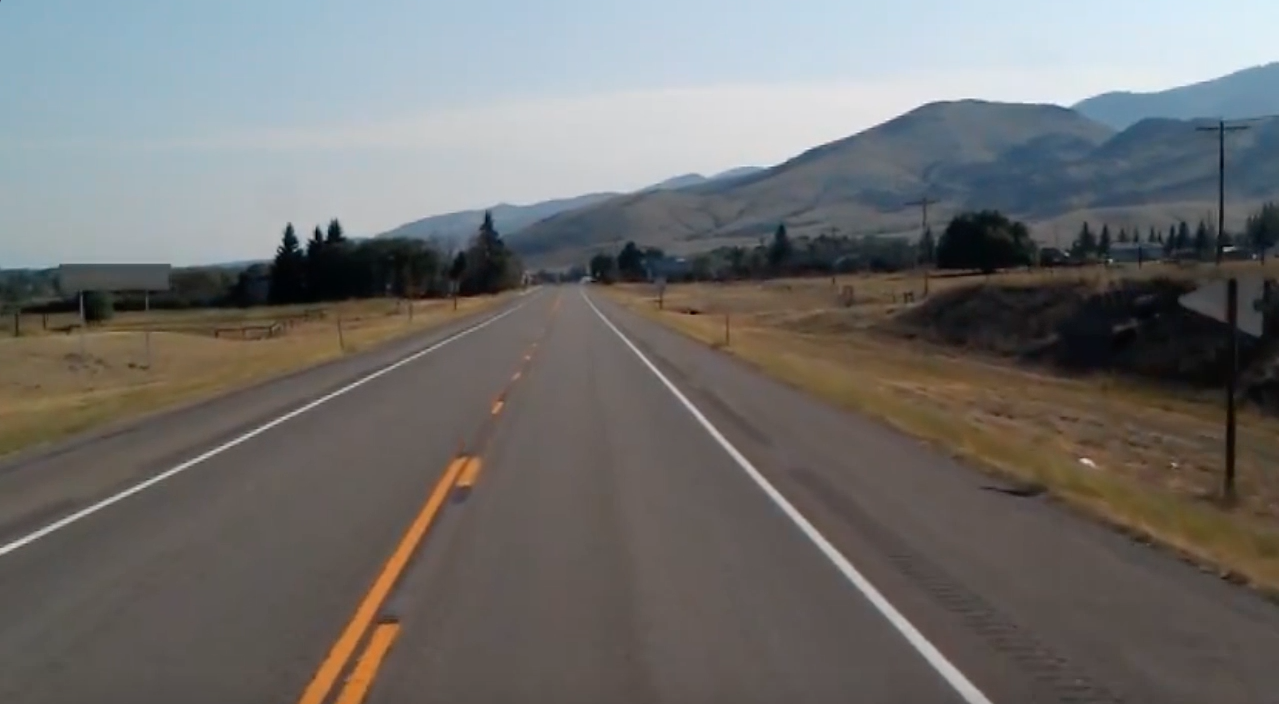

In [1]:
import cv2
image = cv2.imread('/content/test_image.png') # Loading Data
from google.colab.patches import cv2_imshow # No-crash for Google Colab
cv2_imshow(image)

In [2]:
image

array([[[116,  91,  75],
        [194, 174, 134],
        [194, 174, 134],
        ...,
        [248, 238, 215],
        [248, 238, 215],
        [248, 238, 215]],

       [[157, 133, 106],
        [194, 174, 134],
        [194, 174, 134],
        ...,
        [247, 238, 215],
        [247, 238, 215],
        [247, 238, 215]],

       [[185, 163, 127],
        [194, 174, 134],
        [194, 174, 134],
        ...,
        [247, 238, 215],
        [247, 238, 215],
        [247, 238, 215]],

       ...,

       [[ 74,  80,  85],
        [ 74,  80,  85],
        [ 74,  80,  85],
        ...,
        [ 73,  74,  82],
        [ 73,  74,  82],
        [ 73,  74,  82]],

       [[ 74,  80,  85],
        [ 74,  80,  85],
        [ 74,  80,  85],
        ...,
        [ 72,  73,  81],
        [ 72,  73,  81],
        [ 72,  73,  81]],

       [[ 74,  80,  85],
        [ 74,  80,  85],
        [ 74,  80,  85],
        ...,
        [ 72,  73,  81],
        [ 72,  73,  81],
        [ 72,  73,  81]]

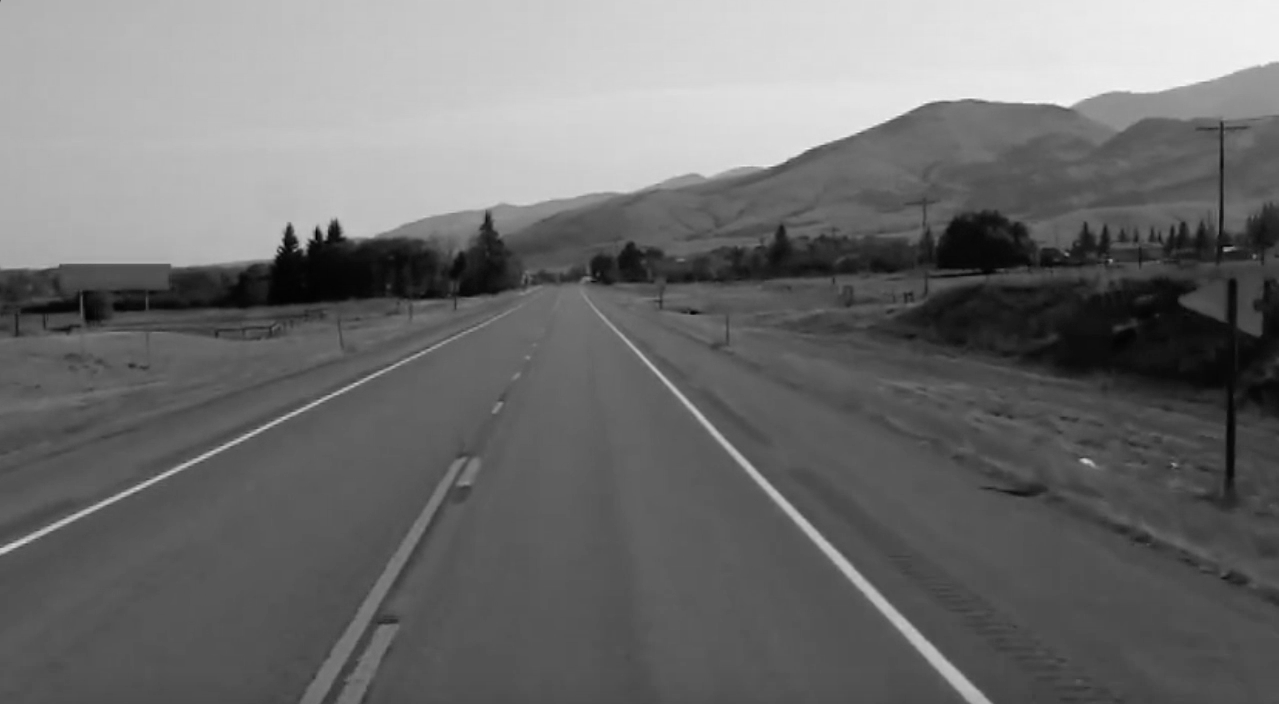

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Grayscaling
# Because processing a single channel image is faster than processing a three-channel coloured image, the video frames are converted.
cv2_imshow(gray_image)

In [4]:
blur = cv2.GaussianBlur(gray_image, (5, 5), 0) # Noise Reduction using a Gaussian filter
# Because noise can result in erroneous edges, image smoothing is required before proceeding.

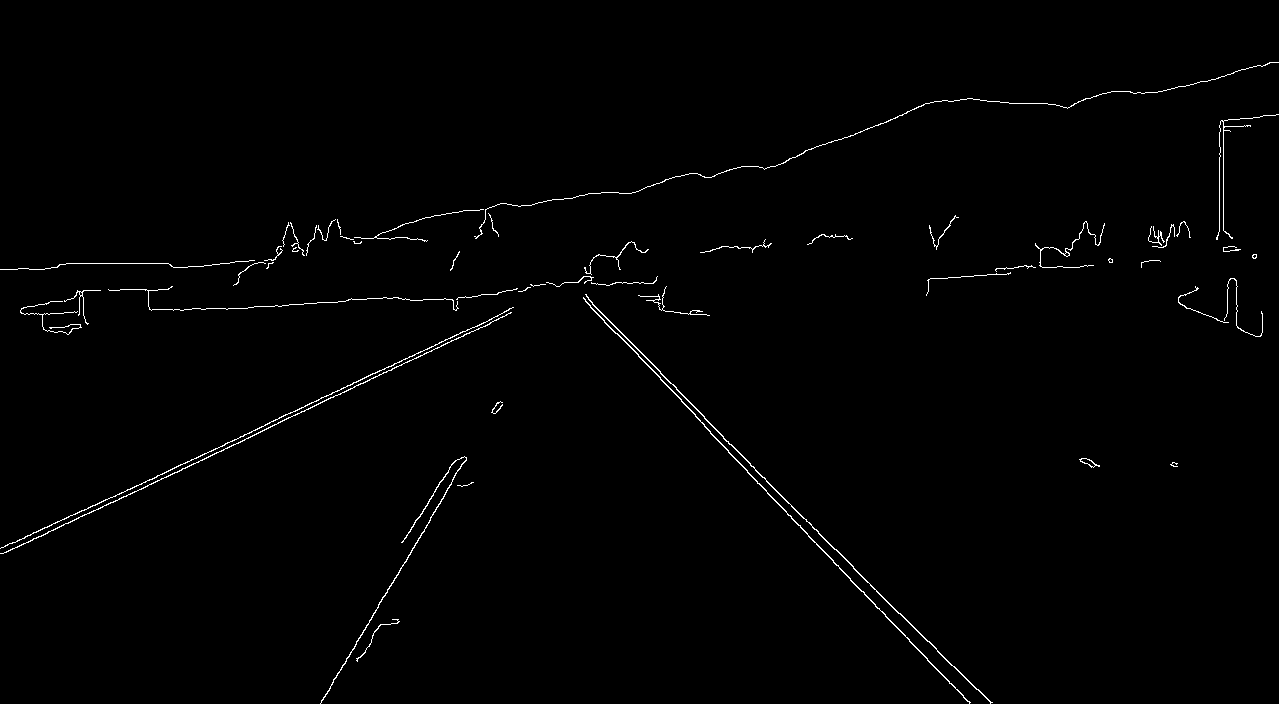

In [5]:
canny_image = cv2.Canny(blur, 50, 150) # It calculates the gradient of our blurred image in all directions and traces the edges with large changes in intensity.
cv2_imshow(canny_image)

In [6]:
import numpy as np
# Our area of interest is shaped like a polygon. Everything except this region should be hidden.
# As a result, we must first specify the polygon's coordinates before using it to create the frame mask.
polygons = np.array([[(200, canny_image.shape[0]), (1100, canny_image.shape[0]), (550, 250)]])
polygons

array([[[ 200,  704],
        [1100,  704],
        [ 550,  250]]])

In [7]:
frame_mask = np.zeros_like(canny_image) # A frame mask is a NumPy Array.
# We simply change the pixel values of the desired region in an image to 0 / 255 / any other number when we want to apply a mask to it.

In [8]:
cv2.fillPoly(frame_mask, polygons, 255) #Packing with many polygons

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

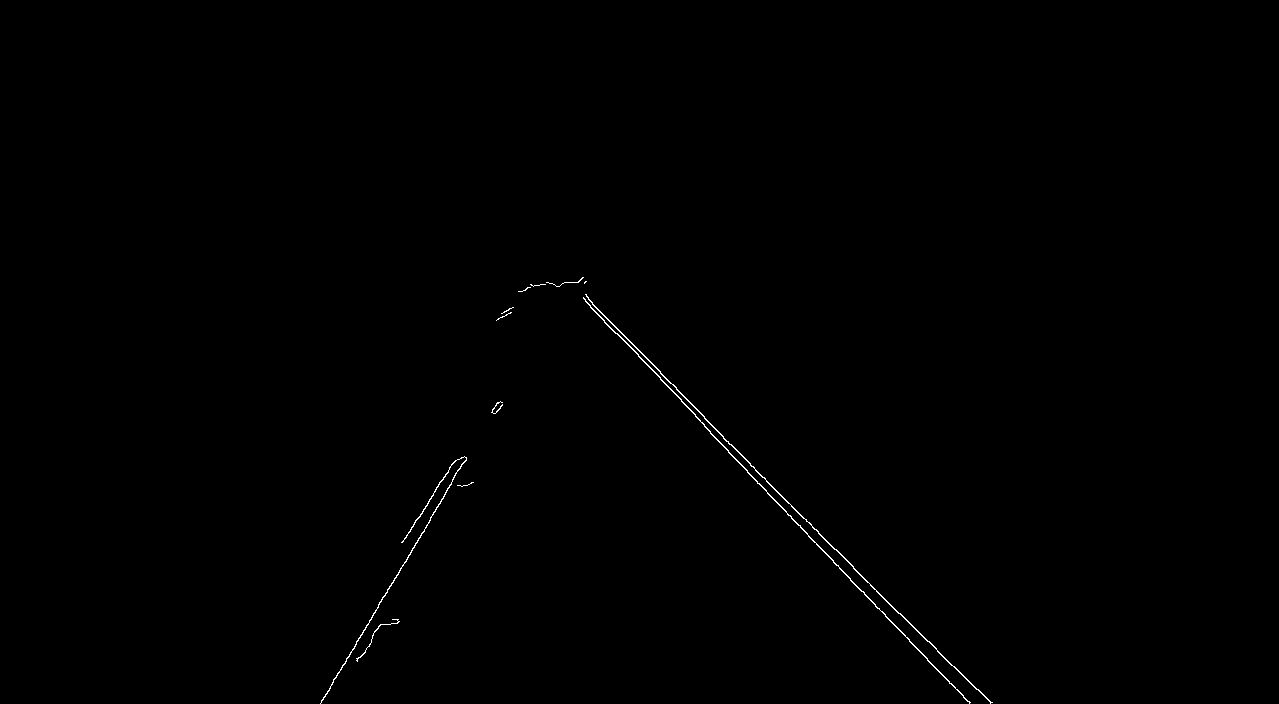

In [9]:
masked_image = cv2.bitwise_and(canny_image, frame_mask) #Cropping to the "region of interest"
cv2_imshow(masked_image)

In [10]:
#The Hough Transform is a method for detecting any shape that can be mathematically represented.
lines = cv2.HoughLinesP(masked_image, 2, np.pi / 180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
# The Probabilistic Hough Line Transform is used in this case, and the output is the detected lines' extremes.
lines

array([[[704, 418, 927, 641]],

       [[704, 426, 791, 516]],

       [[320, 703, 445, 494]],

       [[585, 301, 663, 381]],

       [[630, 341, 670, 383]],

       [[794, 520, 861, 591]],

       [[659, 371, 704, 416]],

       [[870, 599, 939, 672]],

       [[767, 493, 807, 534]],

       [[423, 509, 454, 461]],

       [[940, 653, 991, 702]],

       [[824, 551, 879, 609]],

       [[676, 389, 754, 467]]], dtype=int32)

In [11]:
left_fit = []
right_fit = []
for line in lines:
    x1, y1, x2, y2 = line.reshape(4)
    parameters = np.polyfit((x1, x2), (y1, y2), 1) 
    if parameters[0] < 0:
        left_fit.append((parameters[0], parameters[1]))
    else:
        right_fit.append((parameters[0], parameters[1]))

In [12]:
def create_coordinates(image, line_parameters): #Calculating co-ordinates of the lane
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1 * (3 / 5))
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])

In [13]:
left_line = create_coordinates(image, np.average(left_fit, axis = 0))
left_line

array([308, 704, 483, 422])

In [14]:
right_line = create_coordinates(image, np.average(right_fit, axis = 0))
right_line

array([978, 704, 703, 422])

In [15]:
averaged_lines = np.array([left_line, right_line])
averaged_lines

array([[308, 704, 483, 422],
       [978, 704, 703, 422]])

In [16]:
line_image = np.zeros_like(image)
line_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [17]:
if averaged_lines is not None:
    for x1, y1, x2, y2 in averaged_lines:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

In [18]:
combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1) #Image with detected lane
combo_image

array([[[ 94,  74,  61],
        [156, 140, 108],
        [156, 140, 108],
        ...,
        [199, 191, 173],
        [199, 191, 173],
        [199, 191, 173]],

       [[127, 107,  86],
        [156, 140, 108],
        [156, 140, 108],
        ...,
        [199, 191, 173],
        [199, 191, 173],
        [199, 191, 173]],

       [[149, 131, 103],
        [156, 140, 108],
        [156, 140, 108],
        ...,
        [199, 191, 173],
        [199, 191, 173],
        [199, 191, 173]],

       ...,

       [[ 60,  65,  69],
        [ 60,  65,  69],
        [ 60,  65,  69],
        ...,
        [ 59,  60,  67],
        [ 59,  60,  67],
        [ 59,  60,  67]],

       [[ 60,  65,  69],
        [ 60,  65,  69],
        [ 60,  65,  69],
        ...,
        [ 59,  59,  66],
        [ 59,  59,  66],
        [ 59,  59,  66]],

       [[ 60,  65,  69],
        [ 60,  65,  69],
        [ 60,  65,  69],
        ...,
        [ 59,  59,  66],
        [ 59,  59,  66],
        [ 59,  59,  66]]

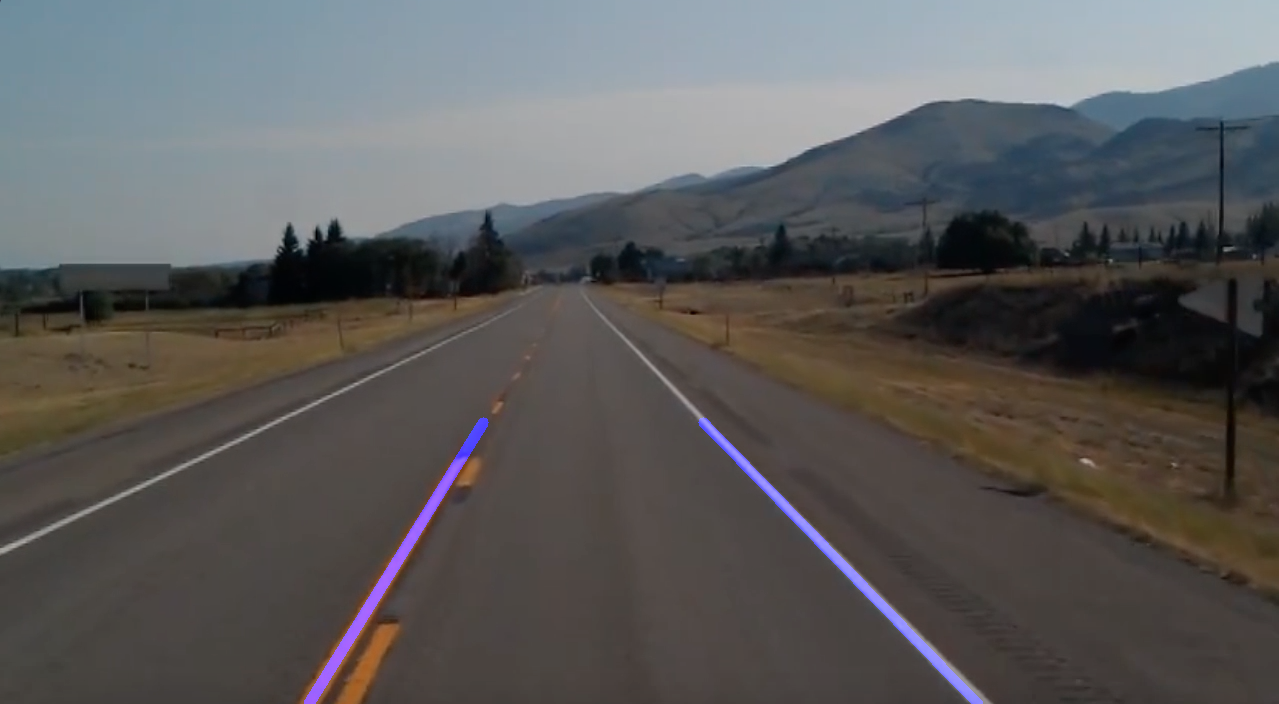

In [19]:
cv2_imshow(combo_image)